# Proyecto: Análisis Visual Completo (con Seaborn)

# Datos sobre el cambio climático global (2020-2025)

Este proyecto analiza datos relacionados con el cambio climático global entre 2020 y 2025.
El objetivo es explorar las variables, visualizarlas y crear un pequeño dashboard que muestre las tendencias más importantes.

In [1]:
import pandas as pd

df = pd.read_csv("Global_Climate_Change_Data_2020_2025.csv")
df.head()


,Year,Continent,Country,Avg_Temperature(°C),CO2_Emissions(Mt),Sea_Level_Rise(mm),Climate_Risk_Index
0,2021,Europe,UK,19.6,978.24,3.57,28
1,2022,Asia,India,25.3,770.39,1.47,74
2,2022,Asia,Japan,23.2,963.84,3.09,48
3,2020,North America,Mexico,20.8,349.49,3.81,23
4,2024,Africa,Egypt,33.1,475.82,3.35,86


In [4]:
df.shape


(1200, 7)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 1200 non-null   int64  
 1   Continent            1200 non-null   object 
 2   Country              1200 non-null   object 
 3   Avg_Temperature(°C)  1200 non-null   float64
 4   CO2_Emissions(Mt)    1200 non-null   float64
 5   Sea_Level_Rise(mm)   1200 non-null   float64
 6   Climate_Risk_Index   1200 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 65.8+ KB


In [2]:
df.dtypes


,0
Year,int64
Continent,object
Country,object
Avg_Temperature(°C),float64
CO2_Emissions(Mt),float64
Sea_Level_Rise(mm),float64
Climate_Risk_Index,int64


In [3]:
df.isna().sum()
df.isna().mean() * 100   # porcentaje


,0
Year,0.0
Continent,0.0
Country,0.0
Avg_Temperature(°C),0.0
CO2_Emissions(Mt),0.0
Sea_Level_Rise(mm),0.0
Climate_Risk_Index,0.0


### Gráficas

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

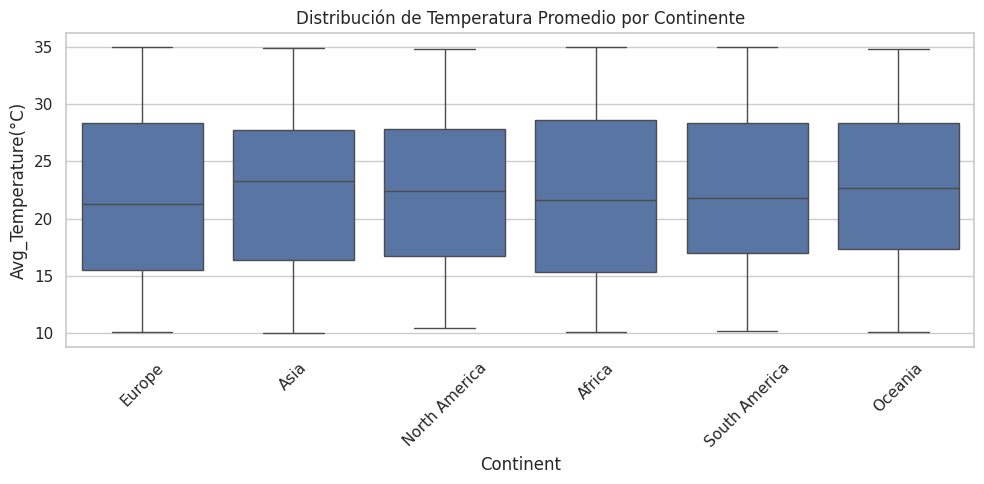

In [9]:
# 1. Boxplot temperatura por continente
plt.figure(figsize=(10,5))
sns.boxplot(x="Continent", y="Avg_Temperature(°C)", data=df)
plt.title("Distribución de Temperatura Promedio por Continente")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

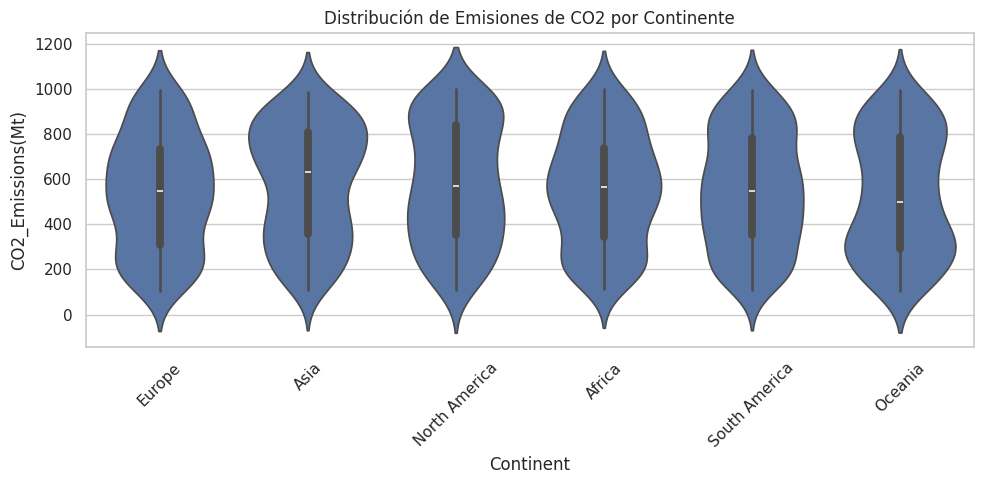

In [10]:
# 2. Violinplot emisiones CO2 por continente
plt.figure(figsize=(10,5))
sns.violinplot(x="Continent", y="CO2_Emissions(Mt)", data=df)
plt.title("Distribución de Emisiones de CO2 por Continente")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

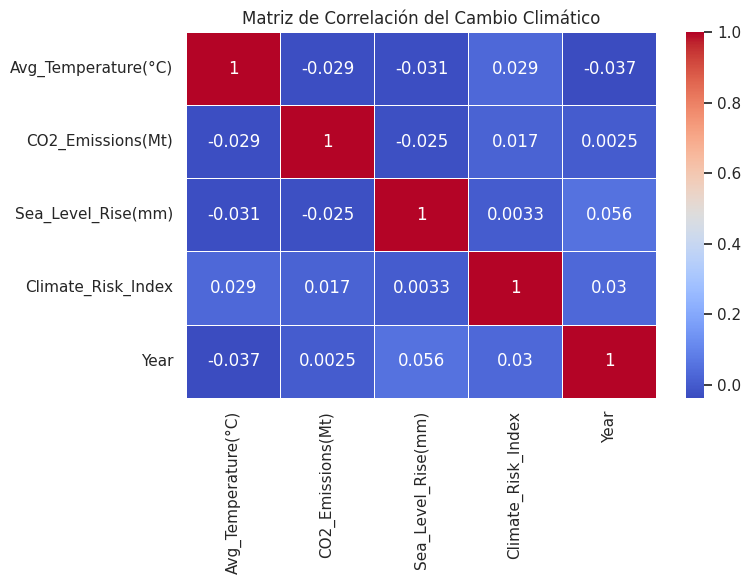

In [11]:
# 3. Heatmap correlación
plt.figure(figsize=(8,6))
corr = df[["Avg_Temperature(°C)", "CO2_Emissions(Mt)", "Sea_Level_Rise(mm)", "Climate_Risk_Index", "Year"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación del Cambio Climático")
plt.tight_layout()
plt.show()

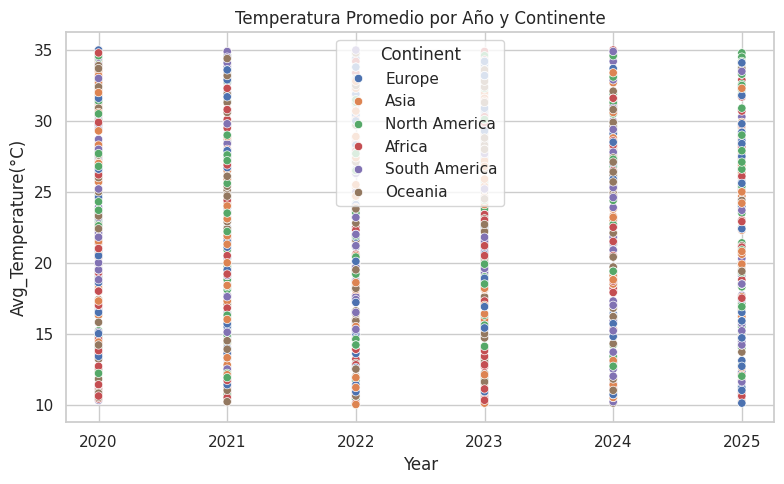

In [12]:
# 4. Scatter Año vs Temperatura
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Year", y="Avg_Temperature(°C)", hue="Continent")
plt.title("Temperatura Promedio por Año y Continente")
plt.tight_layout()
plt.show()


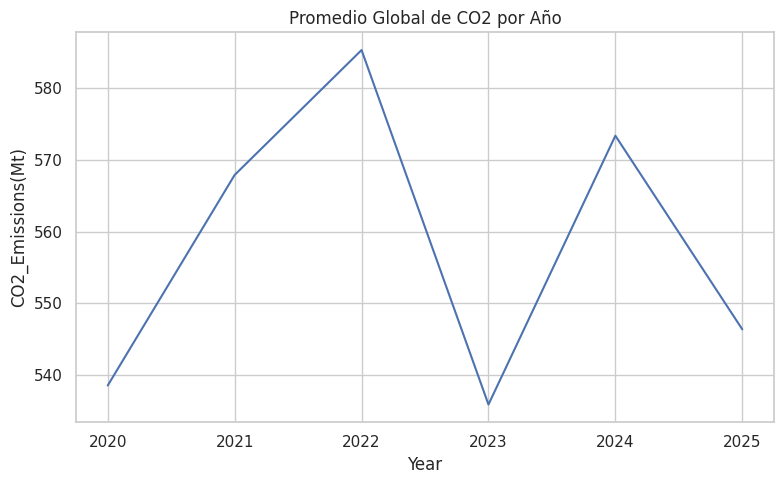

In [14]:
# 5. Lineplot CO2 global por año
plt.figure(figsize=(8,5))
sns.lineplot(
    data=df.groupby("Year")["CO2_Emissions(Mt)"].mean().reset_index(),
    x="Year", y="CO2_Emissions(Mt)"
)
plt.title("Promedio Global de CO2 por Año")
plt.tight_layout()
plt.show()

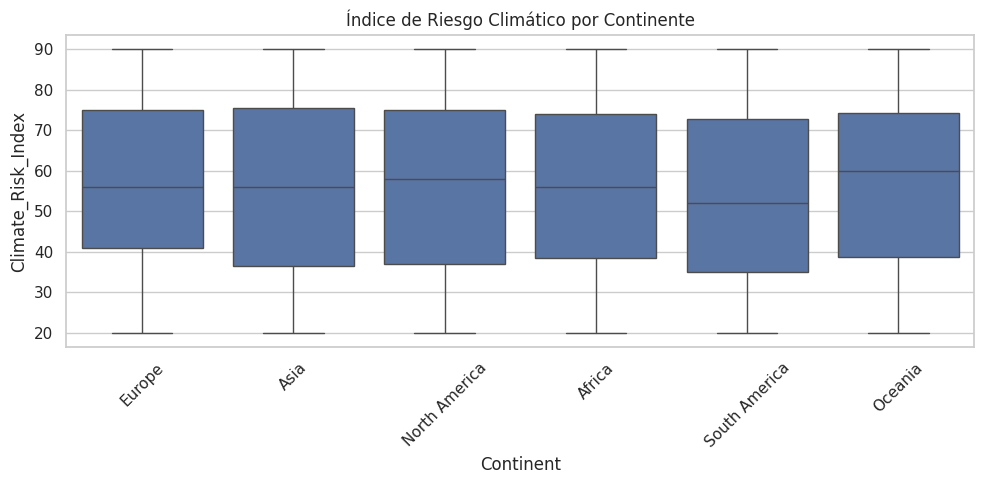

In [15]:
# 6. Boxplot Climate Risk Index
plt.figure(figsize=(10,5))
sns.boxplot(x="Continent", y="Climate_Risk_Index", data=df)
plt.title("Índice de Riesgo Climático por Continente")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

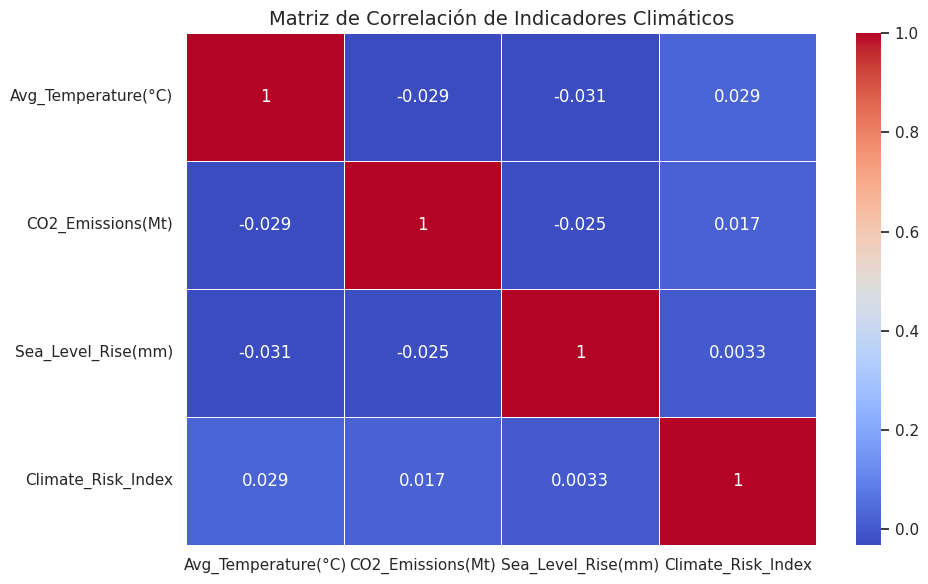

In [20]:
#Matriz de Correlación Profesional

import os
os.makedirs("figures", exist_ok=True)

plt.figure(figsize=(10,6))
corr = df[['Avg_Temperature(°C)', 'CO2_Emissions(Mt)', 'Sea_Level_Rise(mm)', 'Climate_Risk_Index']].corr()

sns.set(style="white")
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Matriz de Correlación de Indicadores Climáticos", fontsize=14)
plt.tight_layout()

# Guardar en alta calidad
plt.savefig("figures/matriz_correlacion_climatica.png", dpi=300)
plt.show()


Dashboard con subplots

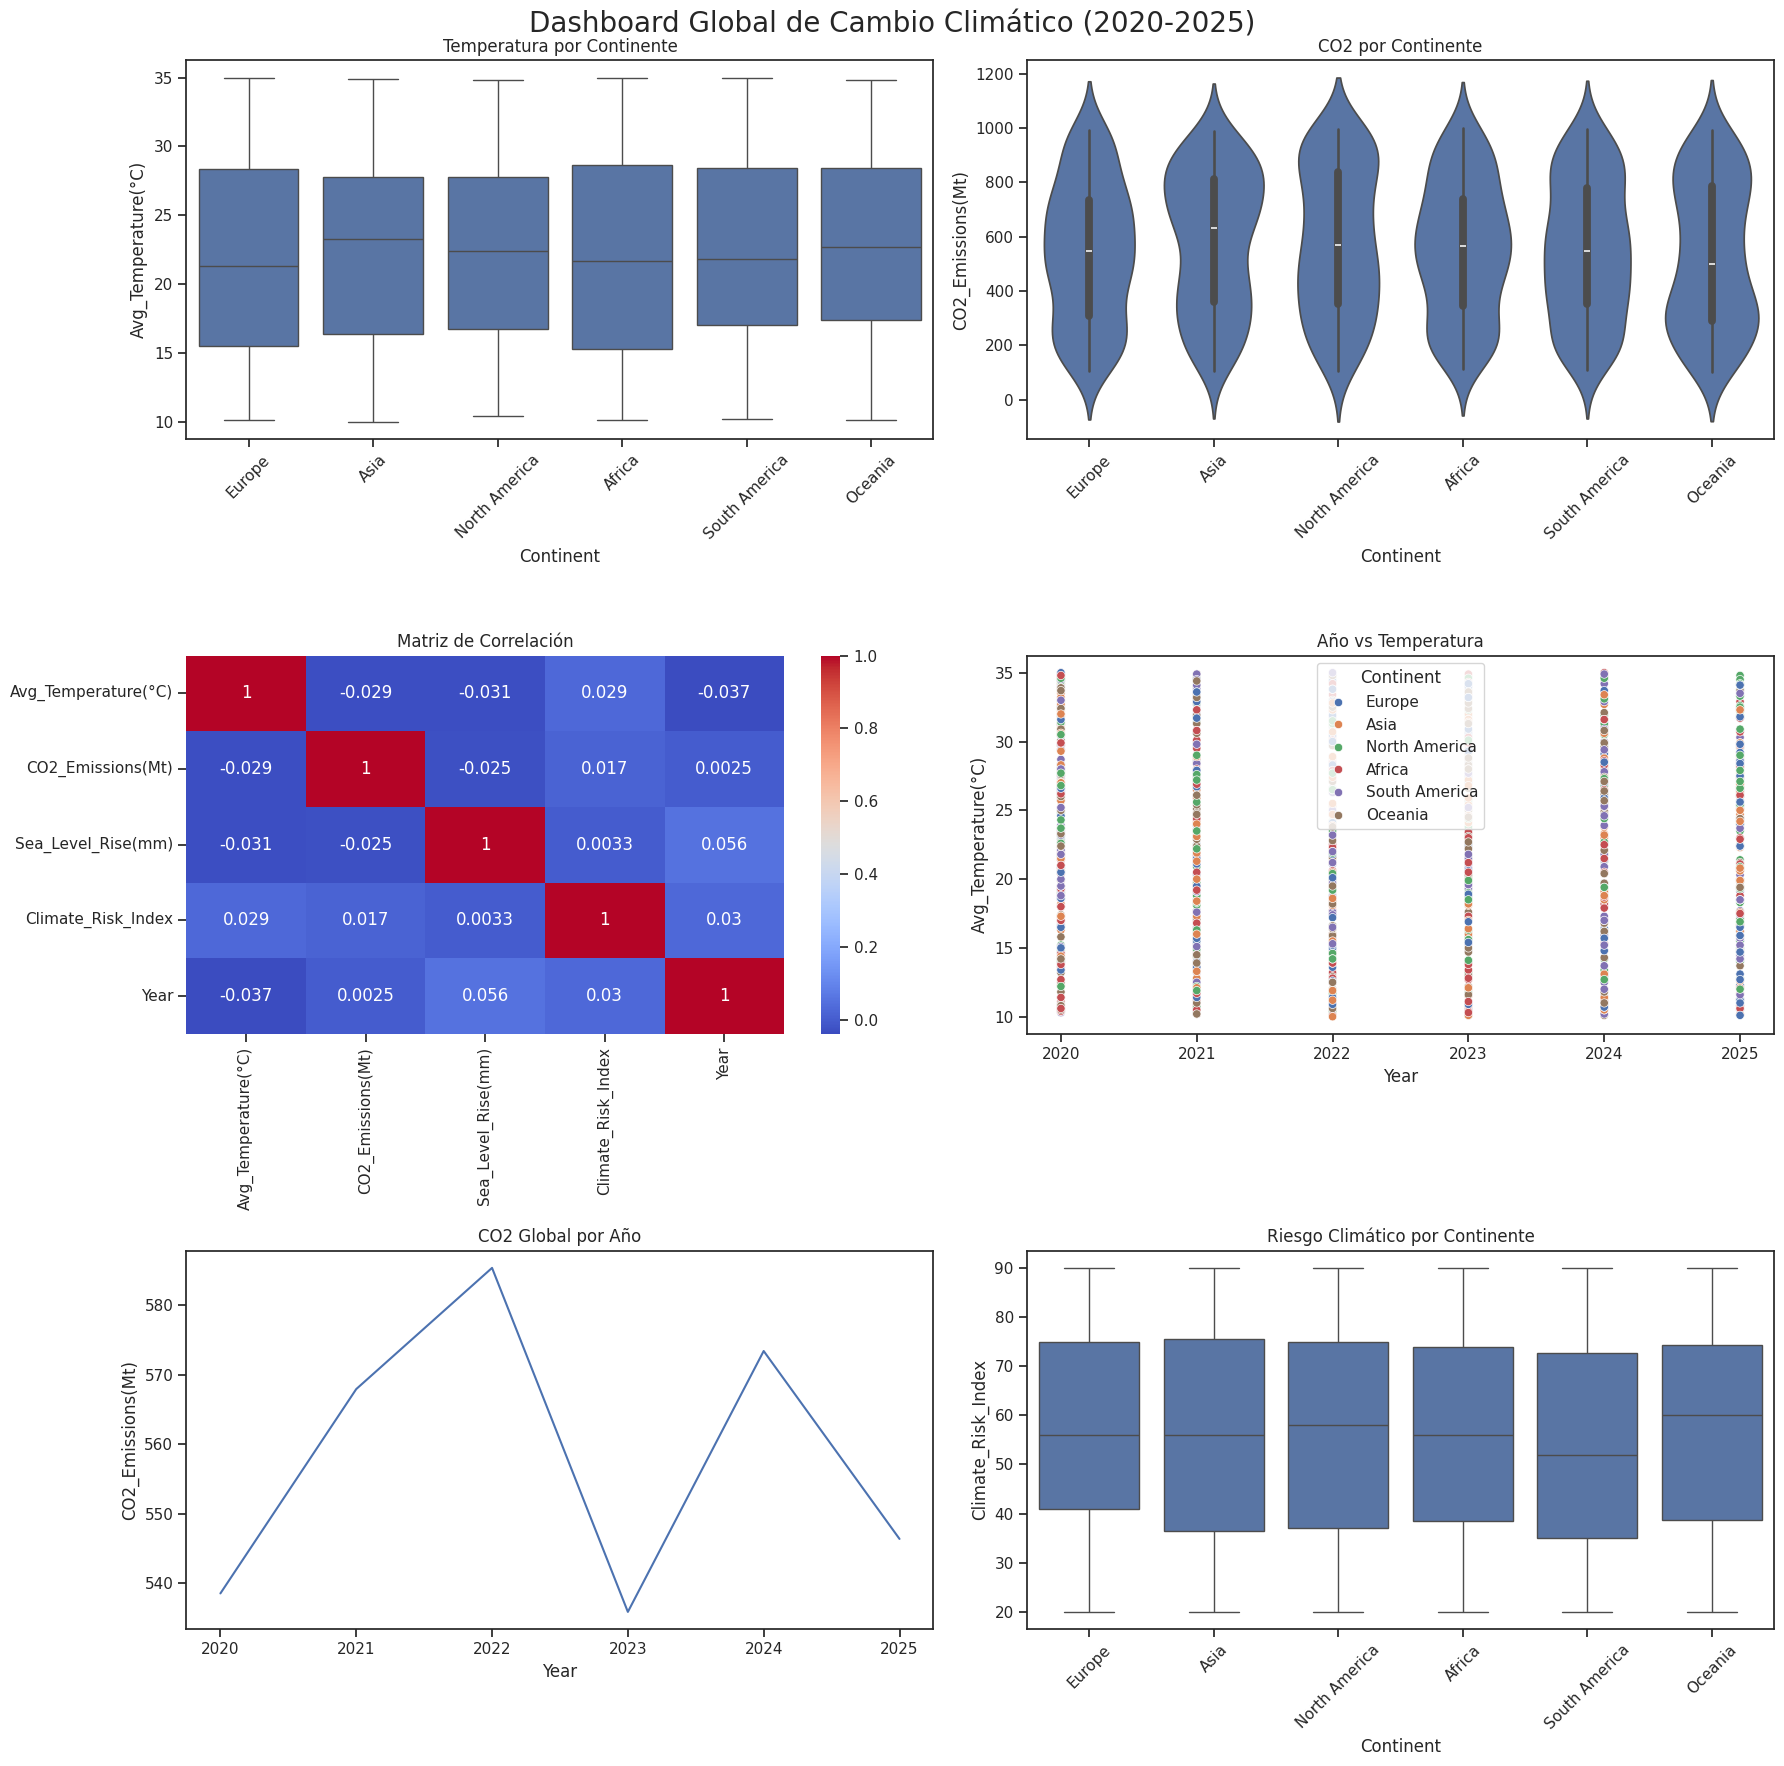

In [16]:
sns.set_theme(style="ticks")

fig, axes = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle("Dashboard Global de Cambio Climático (2020-2025)", fontsize=20)

# 1. Boxplot Temperatura
sns.boxplot(ax=axes[0,0], x="Continent", y="Avg_Temperature(°C)", data=df)
axes[0,0].set_title("Temperatura por Continente")
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Violinplot CO2
sns.violinplot(ax=axes[0,1], x="Continent", y="CO2_Emissions(Mt)", data=df)
axes[0,1].set_title("CO2 por Continente")
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Heatmap correlación
sns.heatmap(df[["Avg_Temperature(°C)", "CO2_Emissions(Mt)", "Sea_Level_Rise(mm)", "Climate_Risk_Index", "Year"]].corr(),
            annot=True, cmap="coolwarm", ax=axes[1,0])
axes[1,0].set_title("Matriz de Correlación")

# 4. Scatter Año vs Temperatura
sns.scatterplot(ax=axes[1,1], data=df, x="Year", y="Avg_Temperature(°C)", hue="Continent")
axes[1,1].set_title("Año vs Temperatura")

# 5. Lineplot CO2 global
sns.lineplot(
    ax=axes[2,0],
    data=df.groupby("Year")["CO2_Emissions(Mt)"].mean().reset_index(),
    x="Year", y="CO2_Emissions(Mt)"
)
axes[2,0].set_title("CO2 Global por Año")

# 6. Boxplot Climate Risk
sns.boxplot(ax=axes[2,1], x="Continent", y="Climate_Risk_Index", data=df)
axes[2,1].set_title("Riesgo Climático por Continente")
axes[2,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [17]:
fig.savefig("dashboard_clima.png", dpi=300)
plt.close()

In [18]:
insights = """
Insights:

1. Los continentes con mayor temperatura promedio son África y Asia.
2. Las emisiones de CO2 muestran mayor variación en Asia.
3. El heatmap indica correlación positiva entre temperatura y aumento del nivel del mar.
4. La temperatura tiende a aumentar ligeramente entre 2020 y 2025.
5. Las emisiones globales promedio de CO2 muestran fluctuaciones anuales.
6. El Índice de Riesgo Climático es más alto en África y Asia, indicando mayor vulnerabilidad.
"""

print(insights)



INSIGHTS PRINCIPALES:

1. Los continentes con mayor temperatura promedio son África y Asia.
2. Las emisiones de CO2 muestran mayor variación en Asia.
3. El heatmap indica correlación positiva entre temperatura y aumento del nivel del mar.
4. La temperatura tiende a aumentar ligeramente entre 2020 y 2025.
5. Las emisiones globales promedio de CO2 muestran fluctuaciones anuales.
6. El Índice de Riesgo Climático es más alto en África y Asia, indicando mayor vulnerabilidad.

